In [3]:
import pandas as pd #Biblioteca responsável para fazer a leitura e impressão de bases de dados
import numpy as np


In [4]:
from sklearn.model_selection import train_test_split

In [5]:

from sklearn.ensemble import RandomForestRegressor


In [6]:
from sklearn.metrics import mean_absolute_error,r2_score

In [7]:
import seaborn  # Biblioteca para plotar gráficos, será usada para o grafico de heatmap(calor) 

In [8]:
import matplotlib
import matplotlib.pyplot as plt 

In [9]:
#aqui irei montar o caminho para buscar o arquivo que subi no drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
dados_enem = pd.read_csv('/content/drive/MyDrive/MICRODADOS_ENEM_2021.csv',sep=';',encoding='latin-1')


*   fillna = remove os NaN e troca pelo argumento inserido



In [11]:
dados_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']] = dados_enem[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].fillna(0)


In [12]:
lista_col = ['TP_ESCOLA','TP_FAIXA_ETARIA','TP_ESTADO_CIVIL','Q001','Q002','Q003','Q004', 'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']

In [13]:
df_lista_col_analise = dados_enem[lista_col]


In [14]:
def case_when(*args):
    return np.select(
        condlist = [args[i] for i in range(0, len(args), 2)],
        choicelist = [args[i] for i in range(1, len(args), 2)],
        default=pd.NA
    )

In [15]:
df_lista_col_analise["SERIEPAI"] = case_when(df_lista_col_analise["Q001"] == "A",1,
                                  df_lista_col_analise["Q001"] == "B", 2, # Not taken because it's after the first line
                                  df_lista_col_analise["Q001"] == "C", 3,
                                  df_lista_col_analise["Q001"] == "D", 4,
                                  df_lista_col_analise["Q001"] == "E", 5,
                                  df_lista_col_analise["Q001"] == "F", 6,
                                  df_lista_col_analise["Q001"] == "G", 7,
                                  df_lista_col_analise["Q001"] == "H", 8,
                                  df_lista_col_analise["Q001"] == "NaN", 9,
                                  df_lista_col_analise["Q001"].isnull(), 9,
                                  True, df_lista_col_analise["Q001"]
                                          )

df_lista_col_analise["SERIEMAE"] = case_when(df_lista_col_analise["Q002"] == "A",1,
                                  df_lista_col_analise["Q002"] == "B", 2, # Not taken because it's after the first line
                                  df_lista_col_analise["Q002"] == "C", 3,
                                  df_lista_col_analise["Q002"] == "D", 4,
                                  df_lista_col_analise["Q002"] == "E", 5,
                                  df_lista_col_analise["Q002"] == "F", 6,
                                  df_lista_col_analise["Q002"] == "G", 7,
                                  df_lista_col_analise["Q002"] == "H", 8,
                                  df_lista_col_analise["Q002"] == "NaN", 9,
                                  df_lista_col_analise["Q002"].isnull(), 9,
                                  True, df_lista_col_analise["Q002"]
                                          )

df_lista_col_analise["OCUPPAI"] = case_when(df_lista_col_analise["Q003"] == "A",1,
                                  df_lista_col_analise["Q003"] == "B", 2, # Not taken because it's after the first line
                                  df_lista_col_analise["Q003"] == "C", 3,
                                  df_lista_col_analise["Q003"] == "D", 4,
                                  df_lista_col_analise["Q003"] == "E", 5,
                                  df_lista_col_analise["Q003"] == "F", 6,
                                  df_lista_col_analise["Q003"] == "G", 7,
                                  df_lista_col_analise["Q003"] == "H", 8,
                                  df_lista_col_analise["Q003"] == "NaN", 9,
                                  df_lista_col_analise["Q003"].isnull(), 9,
                                  True, df_lista_col_analise["Q003"]
                                          )

df_lista_col_analise["OCUPMAE"] = case_when(df_lista_col_analise["Q004"] == "A",1,
                                  df_lista_col_analise["Q004"] == "B", 2, # Not taken because it's after the first line
                                  df_lista_col_analise["Q004"] == "C", 3,
                                  df_lista_col_analise["Q004"] == "D", 4,
                                  df_lista_col_analise["Q004"] == "E", 5,
                                  df_lista_col_analise["Q004"] == "F", 6,
                                  df_lista_col_analise["Q004"] == "G", 7,
                                  df_lista_col_analise["Q004"] == "H", 8,
                                  df_lista_col_analise["Q004"] == "NaN", 9,
                                  df_lista_col_analise["Q004"].isnull(), 9,
                                  True, df_lista_col_analise["Q004"]
                                          )

<ipython-input-15-4855f862859a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lista_col_analise["SERIEPAI"] = case_when(df_lista_col_analise["Q001"] == "A",1,
<ipython-input-15-4855f862859a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lista_col_analise["SERIEMAE"] = case_when(df_lista_col_analise["Q002"] == "A",1,
<ipython-input-15-4855f862859a>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

In [51]:
df_final = df_lista_col_analise.drop(columns=['Q001','Q002','Q003','Q004'])

In [52]:
df_final.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,SERIEPAI,SERIEMAE,OCUPPAI,OCUPMAE
0,1,5,1,0.0,574.6,472.6,0.0,760.0,6,6,2,2
1,1,12,1,505.9,551.8,498.3,461.5,560.0,2,2,2,2
2,1,13,3,0.0,0.0,0.0,0.0,0.0,2,3,3,2
3,2,3,1,580.7,678.9,638.9,659.5,780.0,2,2,2,2
4,2,2,1,497.7,532.4,457.6,582.6,780.0,4,5,6,4


In [53]:


df_decisao = train_test_split(df_final,test_size=0.3,random_state=15)


In [54]:
df_treino = df_decisao[0]
df_teste  = df_decisao[1]

In [55]:
df_teste.head()


,TP_ESCOLA,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,SERIEPAI,SERIEMAE,OCUPPAI,OCUPMAE
927044,1,11,1,0.0,0.0,0.0,0.0,0.0,8,8,6,2
527570,2,2,1,489.1,548.8,530.1,513.0,540.0,2,2,1,1
2311982,1,7,1,0.0,0.0,0.0,0.0,0.0,8,8,4,4
1553943,3,2,1,444.5,450.0,502.4,485.7,560.0,7,6,4,2
372289,1,6,1,488.4,414.7,420.0,495.9,440.0,2,3,3,6


In [56]:
df_treino.head()

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,SERIEPAI,SERIEMAE,OCUPPAI,OCUPMAE
1759002,2,3,1,484.8,538.8,411.2,517.7,440.0,5,4,3,2
482924,2,2,1,469.2,0.0,0.0,459.8,0.0,2,7,1,4
307985,2,3,1,361.9,392.1,410.0,596.0,380.0,2,3,1,1
2898452,1,2,1,0.0,449.3,540.8,0.0,360.0,7,7,6,6
2402571,2,2,1,542.8,748.3,571.1,606.7,620.0,3,8,1,1


In [57]:
regr1 = RandomForestRegressor(max_depth=5, random_state=0)

In [58]:
regr1.fit(df_treino[['TP_ESCOLA','TP_FAIXA_ETARIA','TP_ESTADO_CIVIL']],df_treino[['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_REDACAO']])


RandomForestRegressor(max_depth=5, random_state=0)

In [59]:
df_teste_pred = regr1.predict(df_teste[['TP_ESCOLA','TP_FAIXA_ETARIA','TP_ESTADO_CIVIL']])

In [60]:
y_true = df_teste[['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_REDACAO']]
y_pred = df_teste_pred



In [63]:
print(mean_absolute_error(y_true, y_pred))
print(r2_score(y_true, y_pred))

212.59721217322777
0.1233129769497799


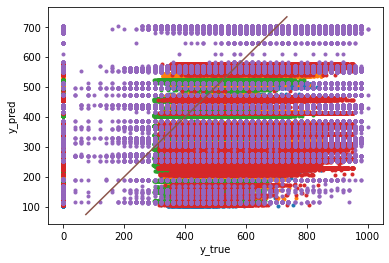

In [64]:
# plotando valores verdadeiros contra predições
plt.plot(y_true, y_pred,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_true')
plt.ylabel('y_pred');

In [65]:
regr2 = RandomForestRegressor(max_depth=5, random_state=0)

In [66]:
regr2.fit(df_treino[['SERIEPAI','SERIEMAE','OCUPPAI','OCUPMAE']],df_treino[['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_REDACAO']])

RandomForestRegressor(max_depth=5, random_state=0)

In [67]:
df2_teste_pred = regr2.predict(df_teste[['SERIEPAI','SERIEMAE','OCUPPAI','OCUPMAE']])

In [68]:
y_true2 = df_teste[['NU_NOTA_CN',	'NU_NOTA_CH',	'NU_NOTA_LC',	'NU_NOTA_MT',	'NU_NOTA_REDACAO']]
y_pred2 = df2_teste_pred



In [69]:
print(mean_absolute_error(y_true2, y_pred2))
print(r2_score(y_true2, y_pred2))

220.87787642610857
0.09371417649001439


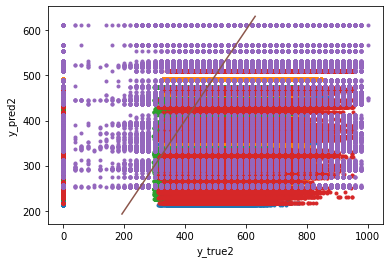

In [70]:
# plotando valores verdadeiros contra predições
plt.plot(y_true2, y_pred2,'.')

# plotando a reta x=y
plt.plot(plt.gca().get_ylim(), plt.gca().get_ylim())

# legenda dos eixos
plt.xlabel('y_true2')
plt.ylabel('y_pred2');

In [71]:
dados_corr = df_final.corr()
dados_corr

,TP_ESCOLA,TP_FAIXA_ETARIA,TP_ESTADO_CIVIL,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
TP_ESCOLA,1.000000,-0.400859,-0.103897,0.145104,0.136115,0.142451,0.153742,0.147155
TP_FAIXA_ETARIA,-0.400859,1.000000,0.313685,-0.272460,-0.274181,-0.299494,-0.293911,-0.309577
TP_ESTADO_CIVIL,-0.103897,0.313685,1.000000,-0.064323,-0.064568,-0.072508,-0.069913,-0.077718
NU_NOTA_CN,0.145104,-0.272460,-0.064323,1.000000,0.897340,0.896403,0.967627,0.852288
NU_NOTA_CH,0.136115,-0.274181,-0.064568,0.897340,1.000000,0.976953,0.887550,0.899728
NU_NOTA_LC,0.142451,-0.299494,-0.072508,0.896403,0.976953,1.000000,0.886637,0.904206
NU_NOTA_MT,0.153742,-0.293911,-0.069913,0.967627,0.887550,0.886637,1.000000,0.852144
NU_NOTA_REDACAO,0.147155,-0.309577,-0.077718,0.852288,0.899728,0.904206,0.852144,1.000000


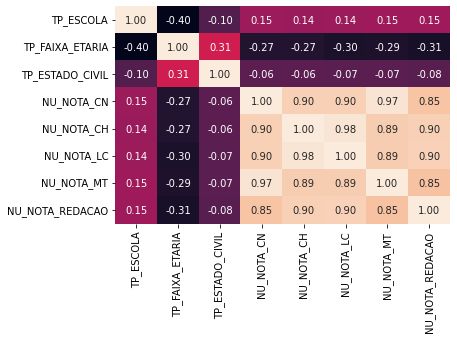

In [73]:
seaborn.heatmap(data= dados_corr,
                cbar= False,
                annot= True,
                fmt=".2f")

heatmap (gráfico de calor):

* annot = inclui a anotação no gráfico
* fmt = formato que a anotação deve ser (.2f) -> float com 2 casas decimais
* cbar = remove a barra colorida (nível de calor) da imagem

Projeto Final